**Problem statement**

#A medical insurance company wants to create automatic system that can predict what is the medical insurance cost of a person will be.
#Need to predict the insurance cost. 

In [1]:
#parameters of project
#1.what are some health issues person had.
#2.Gender of the person.


In [2]:
##1.Collect the data
#Here we need insurance cost data so for predicting we need some data .ml will learn some parameters.This data will feed our Ml Model
#2.Data Analysis 
#for understanding what this data gives all about.
#3.Data pre processing
#processing data will be compatible to go into machine learning model
#4.Training data and testing data
#in Ml we train our model with train data
#we evaluate our model with test data
#5.Machine learning model
  #  RandomForestRegressor
#6.trained model
#7.Prediction of insurance cost



Steps in project
1.Collect the data
Here we need insurance cost data so for predicting we need some data .ml will learn some parameters.This data will feed our Ml Model
2.Data Analysis 
for understanding what this data gives all about.
3.Data pre processing
processing data will be compatible to go into machine learning model
4.Training data and testing data
in Ml we train our model with train data
we evaluate our model with test data
5.Machine learning model
    1.Linear regression Model
6.trained linear regression model
7.Prediction of insurance cost


In [3]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


Data Collection and Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('insurance.csv')

In [6]:
# first 5 rows of the dataframe
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




> The insurance cost charges is in US dollar value



> Region refers that region in us


>










In [7]:
# number of rows and columns
df.shape

(1338, 7)

In [8]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we dont have any Null values all are Nominal values present.
We have some classes we need to convert these cateogorical features to numerical values.

we have charges as target variable and left of them are features

Categorical Features:
- Sex
- Smoker
- Region

In [9]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We dont have any missing values.

DATA ANALYSIS

In [10]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Describe  function will give us statistical measures only for numerical values not for categorical measures

These percentiles are not percentage.Percentile means25% means  25% of values are less than 27.
50% of value is less than 39

ANALYSING COLUMN BY COLUMN

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


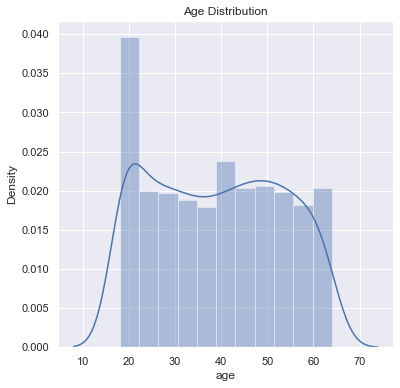

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))          # size of our plot
sns.distplot(df['age'])             # dist plot tells  how the values are distibuted
plt.title('Age Distribution')
plt.show()

The distribution is almost equal  except the age of 20. 

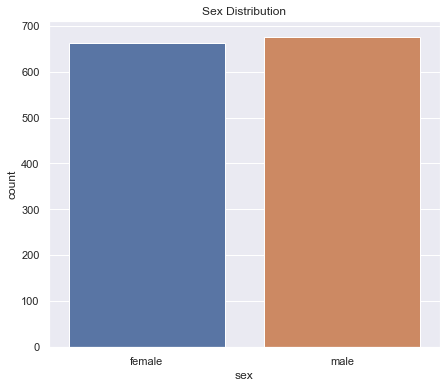

In [12]:
# Gender column
plt.figure(figsize=(7,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [13]:
#another way to know the num of values for male and female.
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


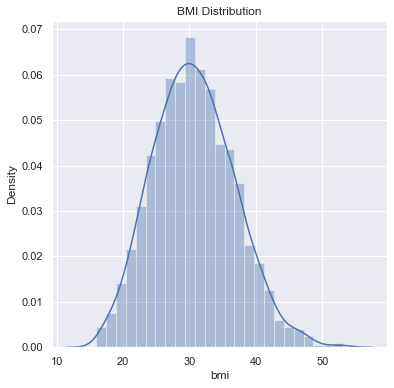

In [14]:
# bmi distribution 
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

BMI means body mass index.it tells wheatre a person is Over weight ,Normal weight or Under weight

Normal BMI range for a person is 18.5 to 24.9
If BMI is less than 18.5 the person is under weight more than 24.9 is over weight.



There are more num of value at 30 range.A lot of people in this data is over weight

This can affect the insurance cost of the person

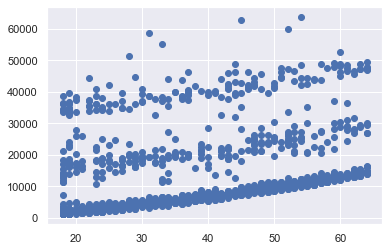

In [21]:
plt.scatter(df.age, df.charges)

#### From the abvove graph, the age and the insurance cost have a positive correlation i.e with increase in age, insurance cost also increases

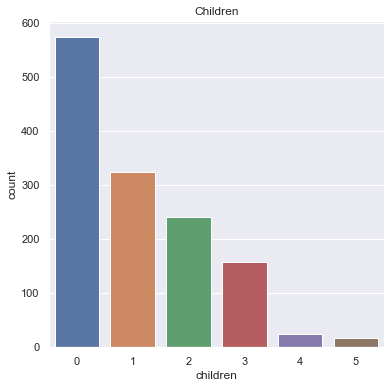

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [16]:
#we can use this value count function to see exactly
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='charges'>

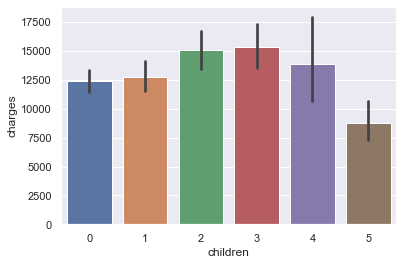

In [24]:
sns.barplot(df.children, df.charges)

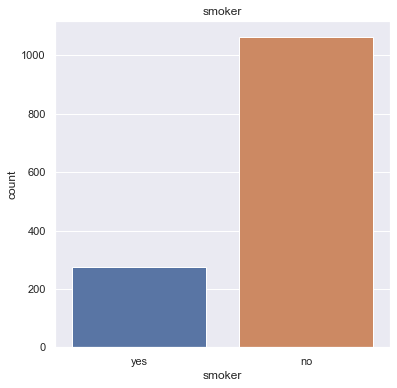

In [17]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='charges'>

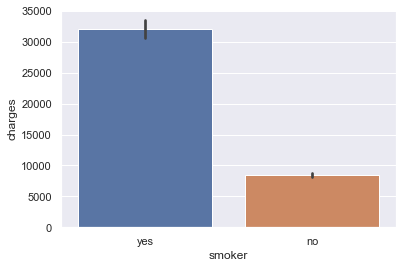

In [19]:
sns.barplot(x=df.smoker, y=df.charges)

#### From the above graphs it is evident that the insurance cost for a smoker is more than thar for a non smoker

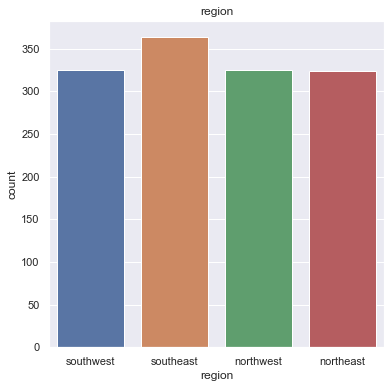

In [25]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [26]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


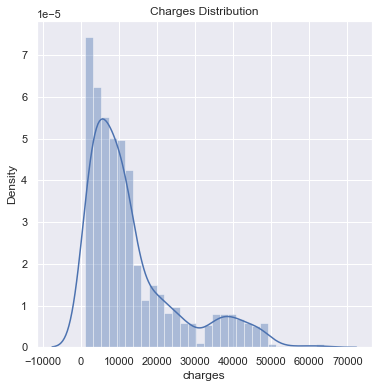

In [28]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

A lot of data is distributed for 10,000 $

Data Pre Processing

In [29]:
# Replacing string values to numbers
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)

In [30]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [33]:
sex = pd.get_dummies(df.sex)

In [34]:
sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [35]:
region = pd.get_dummies(df.region)
region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [36]:
df.drop(['sex', 'region'], axis=1, inplace=True)

In [37]:
df = pd.concat([df,sex,region], axis=1)
df.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


Encoding the categorical features
We are giving the cateogorical features to numerical value

In [38]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [39]:
print(x)

      age     bmi  children  smoker  female  male  northeast  northwest  \
0      19  27.900         0       1       1     0          0          0   
1      18  33.770         1       0       0     1          0          0   
2      28  33.000         3       0       0     1          0          0   
3      33  22.705         0       0       0     1          0          1   
4      32  28.880         0       0       0     1          0          1   
...   ...     ...       ...     ...     ...   ...        ...        ...   
1333   50  30.970         3       0       0     1          0          1   
1334   18  31.920         0       0       1     0          1          0   
1335   18  36.850         0       0       1     0          0          0   
1336   21  25.800         0       0       1     0          0          0   
1337   61  29.070         0       1       1     0          0          1   

      southeast  southwest  
0             0          1  
1             1          0  
2           

X contains all except charges column

In [462]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Y contains only the charges column

In [40]:
#splitting data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


Random state parameters means. We train to run this command incase if we mention 3 or 4 our data will be splitted in different manner.If we put random num 2 both of our data will be splitted in same manner.

In [42]:
print(x.shape, X_train.shape, X_test.shape)

(1338, 10) (1070, 10) (268, 10)


Totally we have 1338 data points. (80%) of data 1070 goes to x Train and (20%) of data  268 goes  to X test

MODEL TRAINING


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
rf_regressor.score(X_train,y_train)

0.9772627772790613

In [46]:
y_test_pred = rf_regressor.predict(X_test)

In [47]:
from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),4)
print(mean_l1_error_test, mean_l2_error_test, Rootmean_l2_error_test)

2640.850569428956 23683975.415505964 4866.6185


In [49]:
rf_regressor.score(X_test,y_test)

0.8422968752127211

### the train and the test score are highly varying hence we will use hyperparameter tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [54]:
rf_randomcv=RandomizedSearchCV(rf_regressor,random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'mae'}

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth'],
                  rf_randomcv.best_params_['max_depth']+50,
                  rf_randomcv.best_params_['max_depth']-50],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf'] + 2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          ],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['mae'], 'max_depth': [780, 830, 730], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [9, 10, 11], 'n_estimators': [700, 800, 900]}


In [69]:
rf_randomcv=GridSearchCV(rf_regressor,param_grid,cv=3,verbose=2,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'max_depth': [780, 830, 730],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [700, 800, 900]},
             verbose=2)

In [70]:
rf_randomcv.best_params_

{'criterion': 'mae',
 'max_depth': 780,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 800}

In [71]:
rf_mod = RandomForestRegressor(n_estimators=800, criterion='mae', max_depth=780, max_features='auto', min_samples_leaf=4,
                            min_samples_split=9)
rf_mod.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=780, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=800)

In [73]:
y_train_pred = rf_mod.predict(X_train)

mae = metrics.mean_absolute_error(y_train,y_train_pred)
mse = metrics.mean_squared_error(y_train,y_train_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
print('Mean absolute error - {}' .format(mae))
print('Mean squared error - {}' .format(mse))
print('Roor mean squared error - {}' .format(rmse))

Mean absolute error - 1594.7596852704273
Mean squared error - 16478167.501197373
Roor mean squared error - 4059.3309179219887


In [74]:
metrics.r2_score(y_train,y_train_pred)

0.8868076275642965

In [75]:
y_test_pred = rf_mod.predict(X_test)

mae = metrics.mean_absolute_error(y_test,y_test_pred)
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('Mean absolute error - {}' .format(mae))
print('Mean squared error - {}' .format(mse))
print('Roor mean squared error - {}' .format(rmse))

Mean absolute error - 1836.2246160042412
Mean squared error - 19794637.883561783
Roor mean squared error - 4449.116528431435


In [76]:
metrics.r2_score(y_test,y_test_pred)

0.8681945833203927

### The model is 88.6 percent accutare. and the training and the testing score are close to each other